In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [16]:
train = pd.read_csv("C:\\Users\\a\\Downloads\\nila\\titanic\\titanic\\train.csv")

test = pd.read_csv("C:\\Users\\a\\Downloads\\nila\\titanic\\titanic\\test.csv")
gender_submission = pd.read_csv("C:\\Users\\a\\Downloads\\nila\\titanic\\titanic\\gender_submission.csv")

# Use only train data for EDA
df = train.copy()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.shape           # Rows and columns
df.columns         # Column names
df.info()          # Data types and null counts
df.describe()      # Statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Check missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [29]:
# Age distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution')

# Fare distribution
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')


Text(0.5, 1.0, 'Fare Distribution')

In [31]:
# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")

# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")


Text(0.5, 1.0, 'Survival by Class')

In [33]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age by Survival")

# Fare vs Survived
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")


Text(0.5, 1.0, 'Fare by Survival')

In [43]:
df_corr_numeric = df_corr.drop(columns=[col for col in ['Name', 'Ticket', 'Cabin'] if col in df_corr.columns])


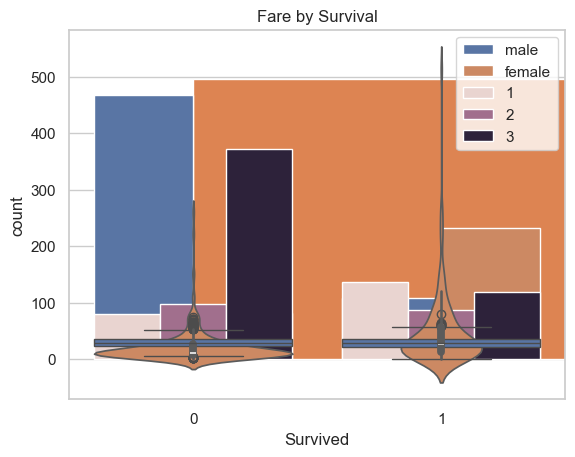

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

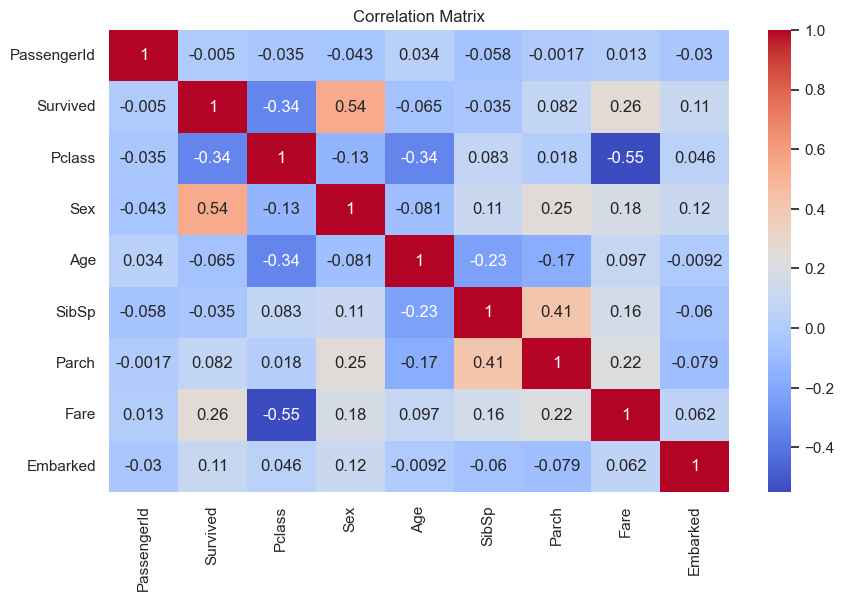

In [45]:
# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [47]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")


Text(0.5, 1.0, 'Survival by Embarkation Port')

In [49]:
df.groupby('Pclass')['Survived'].mean()
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64